# Exercise 6

For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [20]:
df = pd.read_csv('agaricus-lepiota.data')

## 1. Feature selection

Using a classifier evaluator


In [38]:
X, y = df.drop('edibility', axis='columns'), df['edibility']
X, y = pd.get_dummies(X), pd.get_dummies(y)

skb = SelectKBest(chi2, k=2)
skb.fit(X, y) 
X_new = skb.transform(X)

print(X.shape)
print(X_new.shape)

np.array(X.columns)[skb.get_support(indices=True)]

(8124, 117)
(8124, 2)


array(['odor_f', 'odor_n'], dtype=object)

## 2. Principal Component Analysis

In [59]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

# Finner størst varianse
features = [np.abs(pca.components_[i]).argmax() for i in range(Xpca.shape[1])] 
features_names = [X.columns[features[i]] for i in range(Xpca.shape[1])]

print("Features with most important variance:")
for n in features_names: print(' -', n)

#pcaframe = pd.DataFrame(pca.components_, columns=X.columns)
#np.abs(pcaframe.T).idxmax()

Features with most important variance:
 - ring-type_p
 - spore-print-color_h
 - habitat_d


## 3. Overlap

We can see that the features with most variance do not overlap with the features selected in task 1.

However if we look at more than the top features from PCA they overlap, as can be seen in the figure below.

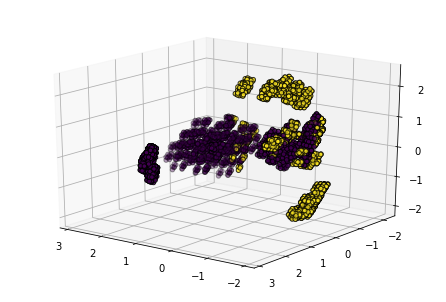

In [39]:
fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=127)

y_colors = [(p == 'e')*1 for p in df['edibility']]

ax.scatter(Xpca[:, 0], 
           Xpca[:, 1], 
           Xpca[:, 2], 
           c=y_colors, 
           edgecolor='k')